# ICON Data Examples Using pysat

In [62]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pds

import pysat

In [102]:
# pysat needs a path to store and load data from
pysat_data_dir = '/Users/russellstoneback/ScienceData'
pysat.utils.set_data_dir(pysat_data_dir)

# ICON IVM Examples

In [9]:
# instantiate IVM Instrument object
# IVM data is automatically cleaned using instrument flags as it is loaded
# levels of 'clean', 'dusty', 'dirty', and 'none' or None are supported
ivm = pysat.Instrument('icon', 'ivm', sat_id='a', clean_level='clean')

/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
  after removing the cwd from sys.path.


In [2]:
# set range of dates to get ICON data
start_date = dt.datetime(2020, 1, 1)
stop_date = dt.datetime(2020, 1, 4)

In [5]:
# download data from Berkeley SSL
ivm.download(start_date, stop_date)

In [41]:
# load a day of data
# all code options below will produce the same result

# load by year and day of year
ivm.load(2020, 1)

# load by date instead
# ivm.load(date=dt.datetime(2020, 1, 1))

# load by filename instead
# ivm.load(fname=ivm.files[0])
# ivm.load(fname=ivm.files[dt.datetime(2020, 1, 1)])

## IVM Basic Density Plot

Text(0,0.5,'Log Ion Density (N/cc)')

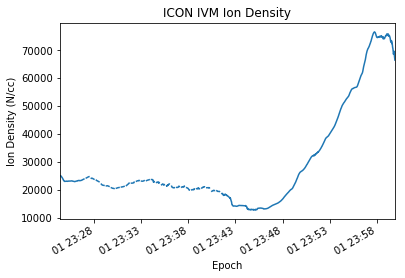

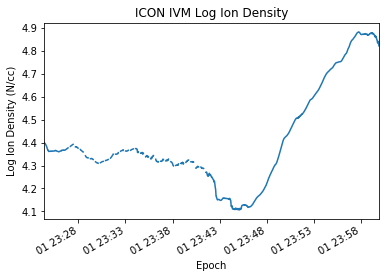

In [88]:
# make basic time series plot of Ion Density

# basic plot of ion density
ivm['Ion_Density'].plot()
plt.title('ICON IVM Ion Density')
plt.ylabel('Ion Density (N/cc)')

# basic plot of the log of ion density
plt.figure()
np.log10(ivm['Ion_Density']).plot()
plt.title('ICON IVM Log Ion Density')
plt.ylabel('Log Ion Density (N/cc)')



## IVM Per-Orbit Density Plots

/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
  from ipykernel import kernelapp as app


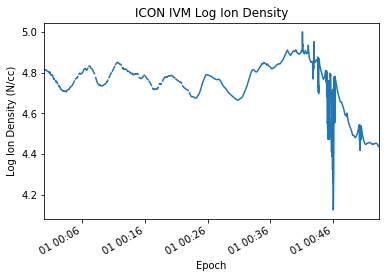

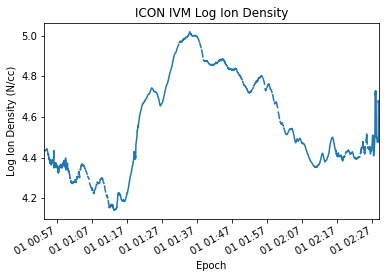

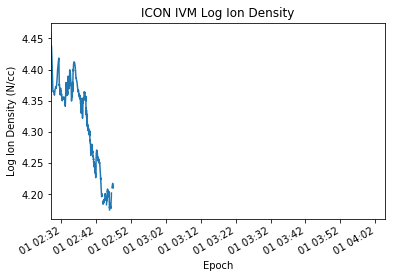

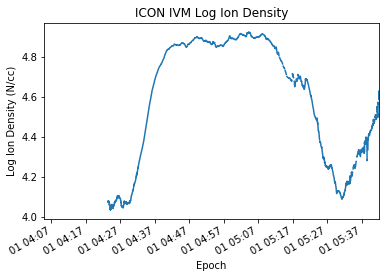

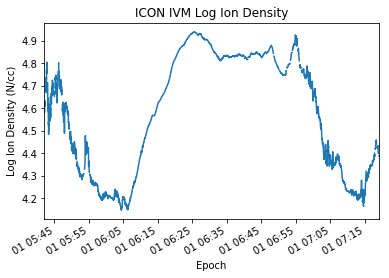

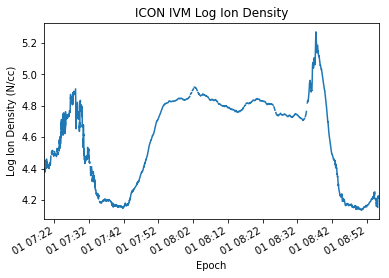

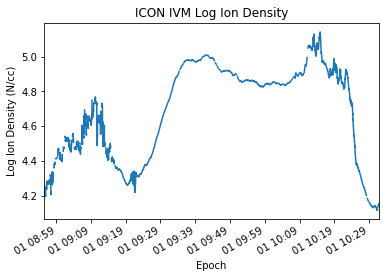

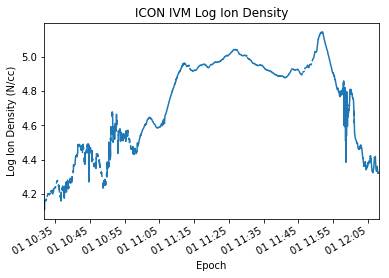

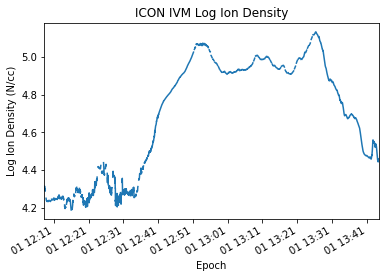

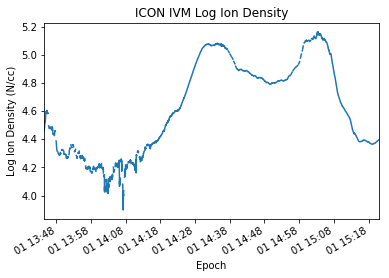

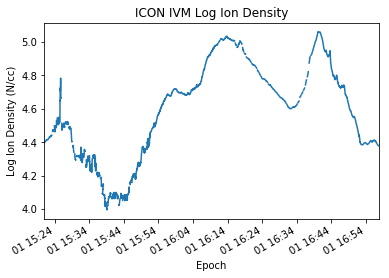

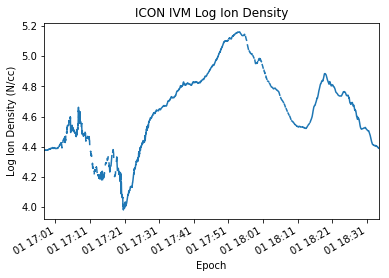

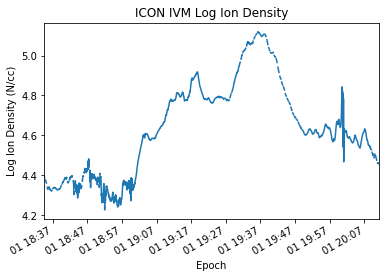

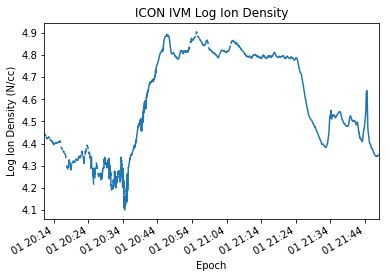

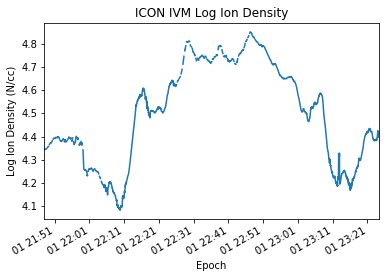

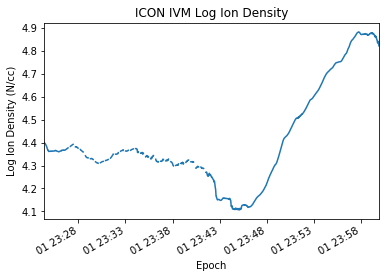

In [89]:
# look at ion density plots orbit by orbit

# set dates
start = dt.datetime(2020, 1, 1)
stop = dt.datetime(2020, 1, 1)

# pysat is able to caculate orbit breaks in real-time
# setup parameters for pysat use
orbit_info = {'kind': 'lt', 'index':'Magnetic_Local_Time'}
# kind sets the type of orbit breakdown, lt for local time
# index sets the variable that will be used for determining orbit breaks

# instantiate ICON IVM Instrument object
# IVM recreated here to ensure robustness as jupyter cells need not be
# executed in order
ivm = pysat.Instrument('icon', 'ivm', sat_id='a', clean_level='clean', 
                       orbit_info=orbit_info)
# set the start and stop dates when iterating over Instrument object
# by default, will iterate over all available data
ivm.bounds = (start, stop)

# iterate over the IVM data orbit-by-orbit
# each loop, a single orbit of data found in ivm.data
for ivm in ivm.orbits:
    plt.figure()
    np.log10(ivm['Ion_Density']).plot()
    plt.title('ICON IVM Log Ion Density')
    plt.ylabel('Log Ion Density (N/cc)')



## Summary Plot - Per Orbit Data Breakdown

/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
  # This is added back by InteractiveShellApp.init_path()
/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: custom.add is deprecated and will be renamed in pysat 3.0.0 as custom.attach


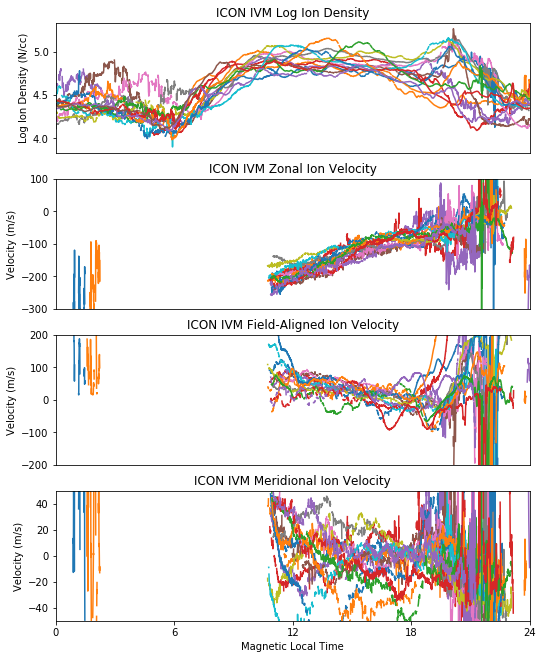

In [90]:
# complete summary plot orbit-by-orbit

# pysat is able to caculate orbit breaks in real-time
# setup parameters for pysat use
orbit_info = {'kind': 'lt', 'index':'Magnetic_Local_Time'}
# kind sets the type of orbit breakdown, lt for local time
# index sets the variable that will be used for determining orbit breaks

# instantiate ICON IVM Instrument object
ivm = pysat.Instrument('icon', 'ivm', sat_id='a', clean_level='clean', 
                       orbit_info=orbit_info)

# set the start and stop dates when iterating over Instrument object
# by default, will iterate over all available data
ivm.bounds = (start, stop)

# add Log Ion Density to Instrument object
def add_log_density(inst):
    """Add the log of ion density to inst
    
    Parameters
    ----------
    inst : pysat.Instrument
    
    """
    inst['Log_Ion_Density'] = np.log10(inst['Ion_Density'])
    return

# attach custom function to Instrument object
# this method is applied automatically to the IVM data 
# every time new data is loaded
ivm.custom.add(add_log_density, 'modify')

# create a figure so each orbit is on the same plot
fig, axs = plt.subplots(4, 1, figsize=(8.5,11))

# use pysat functionality to iterate over the data, orbit by orbit
# each loop, a single orbit of data found in ivm.data
for ivm in ivm.orbits:
    ivm.data.plot(x='Magnetic_Local_Time', y='Log_Ion_Density', 
                  xlim=(0,24), xticks=[],
                  ax=axs[0], legend=False)
    axs[0].set_title('ICON IVM Log Ion Density')
    axs[0].set_ylabel('Log Ion Density (N/cc)')
    axs[0].set_xlabel('')

    ivm.data.plot(x='Magnetic_Local_Time', y='Ion_Velocity_Zonal', 
                  xlim=(0,24), xticks=[],
                  ylim=(-300, 100),
                  ax=axs[1], legend=False)
    axs[1].set_title('ICON IVM Zonal Ion Velocity')
    axs[1].set_ylabel('Velocity (m/s)')
    axs[1].set_xlabel('')

    ivm.data.plot(x='Magnetic_Local_Time', y='Ion_Velocity_Field_Aligned', 
                  xlim=(0,24), xticks=[],
                  ylim=(-200, 200),
                  ax=axs[2], legend=False)
    axs[2].set_title('ICON IVM Field-Aligned Ion Velocity')
    axs[2].set_ylabel('Velocity (m/s)')
    axs[2].set_xlabel('')

    ivm.data.plot(x='Magnetic_Local_Time', y='Ion_Velocity_Meridional', 
                  xlim=(0,24), xticks=(0,6,12,18,24),
                  ylim=(-50, 50),
                  ax=axs[3], legend=False)
    axs[3].set_title('ICON IVM Meridional Ion Velocity')
    axs[3].set_ylabel('Velocity (m/s)')
    axs[3].set_xlabel('Magnetic Local Time')


# ICON MIGHTI Data Examples

In [182]:
# instantiate pysat.Instrument objects for some of the MIGHTI data products

# MIGHTI Vector wind red
mighti_vw_red = pysat.Instrument('icon', 'mighti', tag='vector_wind_red')
# MIGHTI Vector wind green
mighti_vw_green = pysat.Instrument('icon', 'mighti', tag='vector_wind_green')
# MIGHTI Temperature
mighti_temp_a = pysat.Instrument('icon', 'mighti', tag='temperature', sat_id='a')
mighti_temp_b = pysat.Instrument('icon', 'mighti', tag='temperature', sat_id='b')

# collect into a list
mighti_insts = [mighti_vw_red, mighti_vw_green, mighti_temp_a, mighti_temp_b]

/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
  after removing the cwd from sys.path.
/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
  
/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
  
/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
  if __name__ == '__main__':


In [106]:
# download various MIGHTI data products

# if needed, change levels for logging printout to increase feedback
# more information about logging may be found here
# https://docs.python.org/3/library/logging.html
# pysat.logger.setLevel(1) 

# perform download for each dataset
for inst in mighti_insts:
    inst.download(start_date, stop_date)
    
# change levels for logging printout to decrease feedback
# pysat.logger.setLevel(40)

pysat INFO: Downloading data to: /Users/russellstoneback/ScienceData/icon/mighti/vector_wind_red/
pysat.instruments.methods.icon INFO: Attempting to download file for 01/02/20
pysat.instruments.methods.icon INFO: /pub/LEVEL.2/MIGHTI/2020/002/Vector-Winds/ICON_L2-2_MIGHTI_Vector-Wind-Red_2020-01-02_v03r000.NC
pysat.instruments.methods.icon INFO: Finished.
pysat.instruments.methods.icon INFO: Attempting to download file for 01/03/20
pysat.instruments.methods.icon INFO: /pub/LEVEL.2/MIGHTI/2020/003/Vector-Winds/ICON_L2-2_MIGHTI_Vector-Wind-Red_2020-01-03_v03r000.NC
pysat.instruments.methods.icon INFO: Finished.
pysat.instruments.methods.icon INFO: Attempting to download file for 01/04/20
pysat.instruments.methods.icon INFO: /pub/LEVEL.2/MIGHTI/2020/004/Vector-Winds/ICON_L2-2_MIGHTI_Vector-Wind-Red_2020-01-04_v03r001.NC
pysat.instruments.methods.icon INFO: Finished.
pysat INFO: Updating pysat file list
pysat INFO: pysat is searching for icon mighti vector_wind_red files.
pysat INFO: Found 

AttributeError: 'Logger' object has no attribute 'setlevel'

pysat INFO: Returning icon mighti vector_wind_red data for 02 January 2020
pysat INFO: Returning icon mighti vector_wind_green data for 02 January 2020


# MIGHTI Winds Basic Example

Text(0,0.5,'Altitude (km)')

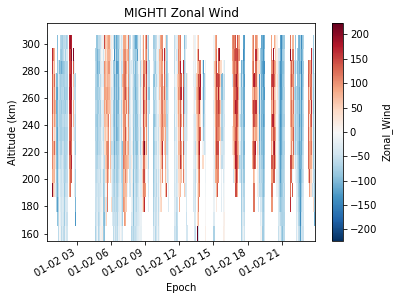

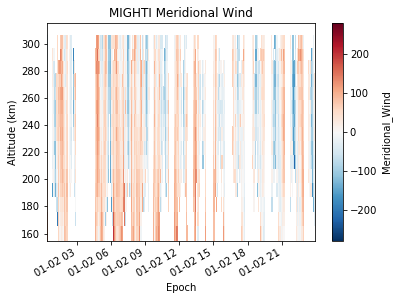

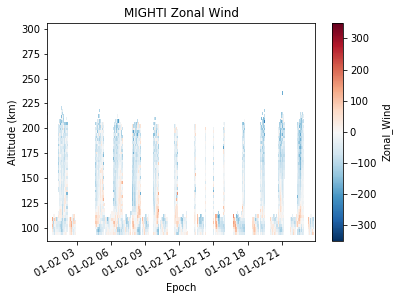

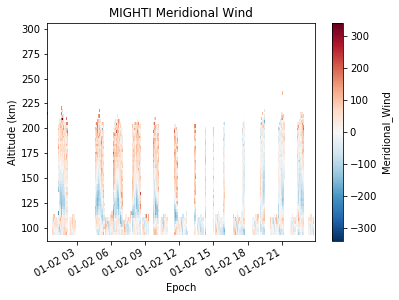

In [185]:
# load day of data
mighti_vw_red.load(2020, 2)
mighti_vw_green.load(2020, 2)

mighti_vw_red['Zonal_Wind'].transpose().plot()
plt.title('MIGHTI Zonal Wind')
plt.ylabel('Altitude (km)')

plt.figure()
mighti_vw_red['Meridional_Wind'].transpose().plot()
plt.title('MIGHTI Meridional Wind')
plt.ylabel('Altitude (km)')

plt.figure()
mighti_vw_green['Zonal_Wind'].transpose().plot()
plt.title('MIGHTI Zonal Wind')
plt.ylabel('Altitude (km)')

plt.figure()
mighti_vw_green['Meridional_Wind'].transpose().plot()
plt.title('MIGHTI Meridional Wind')
plt.ylabel('Altitude (km)')

## MIGHTI Winds Summary Per-Orbit Example


/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: custom.add is deprecated and will be renamed in pysat 3.0.0 as custom.attach


Text(0.5,0,'Profile Average Solar Local Time')

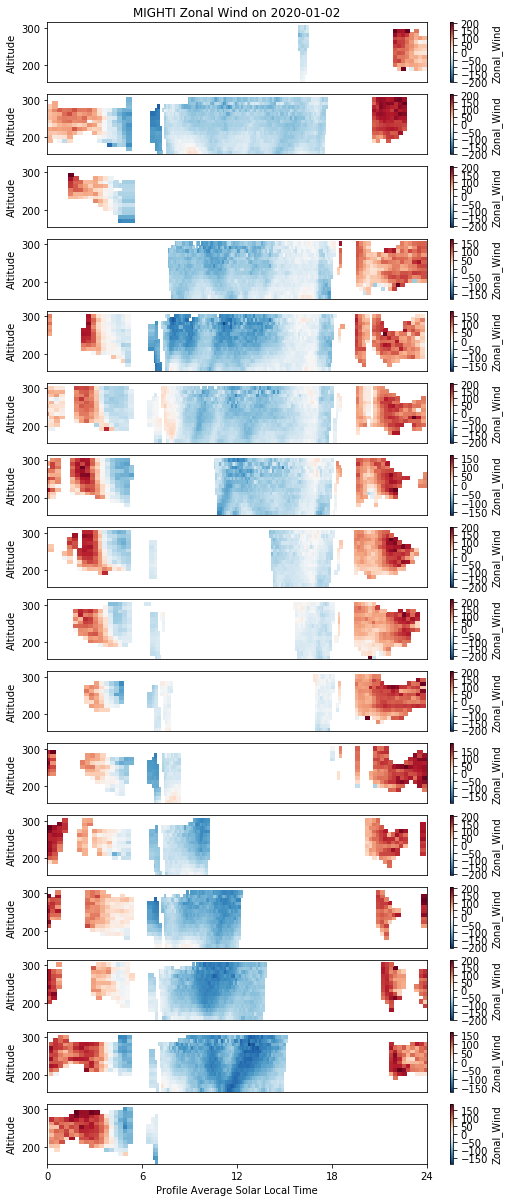

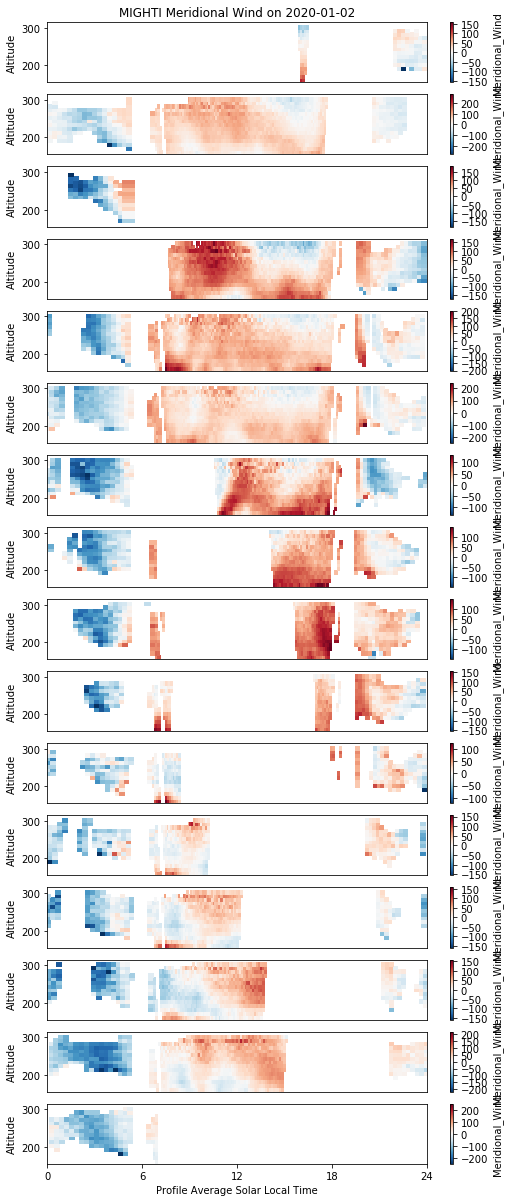

In [60]:
# pick 'red' or 'green' for the line color MIGHTI is using
line_color = 'red'

# set date
date = dt.datetime(2020, 1, 2)

orbit_info = {'kind': 'lt', 'index': 'average_local_time'}

def add_average_local_solar_time(inst):
    """Adds mean profile local solar time as variable """
    # average local time over profile
    inst['average_local_time'] = inst['Local_Solar_Time'].mean(axis=1)
    idx, = np.where(~inst['average_local_time'].isnull())
    inst.data = inst[idx]
    return
    
# MIGHTI Vector Wind
mighti_vw_color = pysat.Instrument('icon', 'mighti', tag='vector_wind_' + line_color,
                                 orbit_info=orbit_info)
# confine orbit calculation to user set date
mighti_vw_color.bounds = (date, date)
# add calculation of profile average local time
mighti_vw_color.custom.add(add_average_local_solar_time, 'modify')

# create a figure so each orbit is on the same plot
fig, axs = plt.subplots(16, 1, figsize=(8.5,21))
figm, axsm = plt.subplots(16, 1, figsize=(8.5,21))


for i, mighti_vw_color in enumerate(mighti_vw_color.orbits):
    # enable support for plotting local_time on x-axis
    alt = ("Epoch", mighti_vw_color['average_local_time'])
    # zonal wind
    a = mighti_vw_color.data['Zonal_Wind'].assign_coords(average_local_time=alt)
    # make plot
    a.transpose().plot(ax=axs[i], x='average_local_time', y='Altitude')
    axs[i].set_xlim((0, 24))
    axs[i].set_xticks([])
    axs[i].set_xlabel('')

    # meridional wind
    a = mighti_vw_color.data['Meridional_Wind'].assign_coords(average_local_time=alt)
    # make plot
    a.transpose().plot(ax=axsm[i], x='average_local_time', y='Altitude')
    axsm[i].set_xlim((0, 24))
    axsm[i].set_xticks([])
    axsm[i].set_xlabel('')


axs[0].set_title('MIGHTI Zonal Wind on ' + date.strftime('%Y-%m-%d'))
axs[-1].set_xticks([0, 6, 12, 18, 24])
axs[-1].set_xlabel('Profile Average Solar Local Time')

axsm[0].set_title('MIGHTI Meridional Wind on ' + date.strftime('%Y-%m-%d'))
axsm[-1].set_xticks([0, 6, 12, 18, 24])
axsm[-1].set_xlabel('Profile Average Solar Local Time')

## MIGHTI Temperature Example

/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
/Users/russellstoneback/opt/miniconda3/envs/standard2/lib/python2.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: custom.add is deprecated and will be renamed in pysat 3.0.0 as custom.attach


AttributeError: 'Dataset' object has no attribute 'rename_dims'

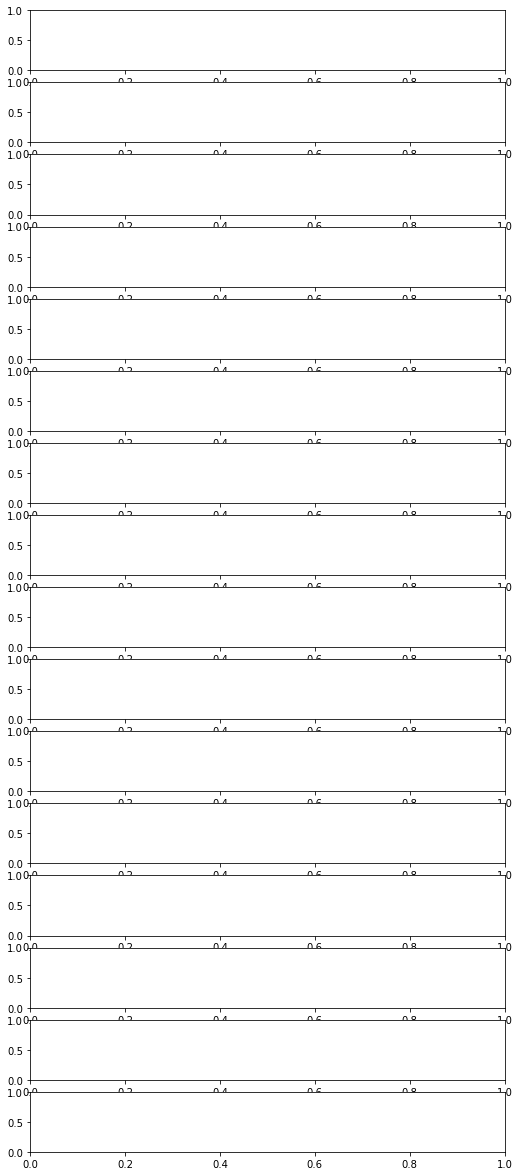

In [67]:
# pick 'a' or 'b' for the MIGHTI instrument
sat_id = 'a'

# set date
date = dt.datetime(2020, 1, 2)

orbit_info = {'kind': 'lt', 'index': 'average_local_time'}

def add_average_local_solar_time(inst):
    """Adds mean profile local solar time as variable """
    # average local time over profile
    inst['average_local_time'] = inst['Local_Solar_Time'].mean(axis=1)
    idx, = np.where(~inst['average_local_time'].isnull())
    inst.data = inst[idx]
    return
    
# MIGHTI Temperature
mighti = pysat.Instrument('icon', 'mighti', tag='temperature',
                                   sat_id=sat_id, orbit_info=orbit_info)
# confine orbit calculation to user set date
mighti.bounds = (date, date)
# add calculation of profile average local time
mighti.custom.add(add_average_local_solar_time, 'modify')

# create a figure so each orbit is on the same plot
fig, axs = plt.subplots(16, 1, figsize=(8.5,21))


for i, mighti in enumerate(mighti.orbits):
    # enable support for plotting local_time on x-axis
    alt = ("Epoch", mighti['average_local_time'])
    a = mighti.data['Temperature'].assign_coords(average_local_time=alt)
    # make plot
    a.transpose().plot(ax=axs[i], x='average_local_time', y='Alt')
    axs[i].set_xlim((0, 24))
    axs[i].set_xticks([])
    axs[i].set_xlabel('')

axs[0].set_title('MIGHTI Temperature on ' + date.strftime('%Y-%m-%d'))
axs[-1].set_xticks([0, 6, 12, 18, 24])
axs[-1].set_xlabel('Profile Average Solar Local Time')



# ICON EUV Example
